# 1　統計学の概論

私たちがこれから学んでいく統計学には、大まかに2種類の統計学（記述統計学・推測統計学）があります。この講座では、それぞれの基本的な考え方と手法を学びます。またこれらの理解に欠かせない確率分布などの数学的なトピックを勉強します。

## 1.1　2種類の統計学

* **記述統計学** (descriptive statistics) :自分の持っているデータを、**数値要約**(numerical summary)、**可視化**(visualization)するなどして、データのもつ特徴・法則性の発見を目的とする統計学
* **推測統計学** (inferential statistics) : 全体の一部分から推測し、全体的な法則の発見に至ることを目的とする統計学。主な手法は**統計的推測**(estimation)と**統計学的仮説検定**(statistical hypothesis testing)。

実際の分析においては、この２つの手法(記述と推測)どちらか一方を用いるのではなく、この２つの方法を相互に補いながら使っていくことになります。一般的には、まず記述統計学的な手法でデータの大まかな特徴を把握したのちに、推測統計的な問題へとうつることが多いでしょう。

**問題** : 以下のニュースや日々の出来事には、どちらの統計学の範疇にある手法が用いられていそうかを考えてみてください。

* 生活保護受給者ついに215万人を超える。(厚生労働省)
* 半沢直樹！最終回瞬間視聴率 40％超え！(TBS) 
* Male finger lengths related to attractiveness (The Daily Telegraph/英)

## 1.2　母集団と標本

自分が調べたい対象全体を**母集団**(population)といいます。この母集団に属している対象を全て調べて行う調査を**全数調査**(comprete survey)といいます。例えば、日本人全員の意識調査を行おうとしたときの母集団は、日本人全員です。しかしながら、現実的には、予算、時間等の関係から、母集団全体を調べることが不可能な場合が多いです。その場合には全体の傾向を代表すると思われる適切な標本を調査し、それを分析して母集団についての推測を行います。母集団から一部を取り出す作業のことを**標本抽出**(sampling)、取り出された一部分のことを**標本**(sample)といいます。このように標本を調べることで、全体の推測を行うような調査を**標本調査**(sample survey)といいます。

<center><img src="./imgs/fig1-3.png" width=300px></center>


**問題** : 以下の調査における母集団を答えてください。また、その調査は全数調査と標本調査かを答えなさい。
1. 衆議院選挙　当選速報
2. ○○社　健康診断
3. 雑誌　読者アンケート

## 1.3　統計学の応用例

例えば、すうがくぶんかがGoogleに「大人 数学」と検索した人に対して、以下のようなリスティング広告を打っているとします。

<center><img src="./imgs/listing.png" width=400px></center>

いまI先生は、旧来のタイトル「社会人のための数学教室」に対して新案「大人のための数学教室」を考えており、新案のほうが旧来のタイトルよりクリック率が高いと期待されるなら、タイトルを変更したほうがよいだろうと考えていました。

この疑問に答えようと考えたK先生は、次のような分析を行いました。まず一週間、2つのタイトル案を同時に走らせます。より正確には、「大人 数学」と検索した人に対して、旧来のタイトルと新案のタイトルのうちどちらか一方をランダムに選択して露出させます。この結果、次のようなデータが得られました。

|案\数|クリック数|インプレッション数|
|:-:|:-:|:-:|
|旧来|40|1256|
|新案|48|1397|

このデータから旧来のタイトルのクリック率はおよそ3.18%、新案のタイトルのクリック率はおよそ3.44%と計算できました。

In [1]:
# クリック率の計算
40/1256, 48/1397

(0.03184713375796178, 0.03435934144595562)

また棒グラフで次のように表現しました。

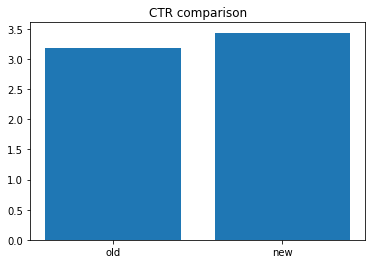

In [2]:
# クリック率の棒グラフ
import matplotlib.pyplot as plt
label = ["old", "new"]
plt.bar(x = [1, 2], height = [40/1256*100, 48/1397*100], tick_label = label)
plt.title("CTR comparison")    # CTR = click through rate
plt.show()

これだけを見ると新案のほうが旧案よりクリック率が高いようにみえます。しかし、この結果は広告を閲覧させたい「大人 数学」で検索するお客さん全体の結果ではなく、あくまでこの一週間に「大人 数学」で検索した人の結果にすぎないことには注意が必要です。

**問題**　これを「母集団は〇〇」「標本は〇〇」という形で表現してください。

実際、K先生は0.3%くらいの差であれば、広告を露出する対象者全体では差がなかった場合でも標本抽出の結果次第で偶然に起こる程度の差なのではないかと考えました。そこで、広告を露出する対象者全体でクリック率を比較したとしても、新案のほうがクリック率が高そうかを検討します。今回の場合「母比率の差の検定」とよばれる方法が役に立ちます。

In [3]:
# 母比率の差の検定
import numpy as np
import scipy.stats as ss

crs_tb = np.array([[40, 1256], [48, 1397]])
stat, p_value, df, exp = ss.chi2_contingency(crs_tb)
p_value    # p-値

0.8099386547551954

この結果、（有意水準5%で）旧来と新案とでは広告を露出する対象者全体でのクリック率に差があるとはいえないとK先生は結論づけました。I先生は、K先生の分析を受けて、旧来と新案でクリック率に差がないと考えられるのであれば、旧来のタイトルのほうが弊社のイメージに近く差し替えるメリットがないと考え、新案に差し替えない方針をとることにしました。

**問題**　これまでに登場した「クリック率の計算」「棒グラフ」「母比率の差の検定」はそれぞれ記述統計学・推測統計学のどちらかを答えてください。